<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/MRI/MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.DataFrame(columns = ['Tumor Area','Tumor Perimeter','Tumor Density','Tumor Centroid'])
data

,Tumor Area,Tumor Perimeter,Tumor Density,Tumor Centroid


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

def describe_location(box):
    x, y, w, h = box
    leftmost = x
    rightmost = x + w
    upper = y
    lower = y + h

    location_description = {
        'leftmost': leftmost,
        'rightmost': rightmost,
        'upper': upper,
        'lower': lower
    }

    return location_description

def resize_image(image, target_size=(100, 100)):
    return cv2.resize(image, target_size)

def measure_tumor_properties(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = resize_image(img, target_size=(300, 300))
    blurred = cv2.GaussianBlur(img_resized, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    tumor_area = cv2.contourArea(max_contour)
    tumor_perimeter = cv2.arcLength(max_contour, True)
    x, y, w, h = cv2.boundingRect(max_contour)
    M = cv2.moments(max_contour)
    centroid_x = int(M["m10"] / M["m00"])
    centroid_y = int(M["m01"] / M["m00"])
    tumor_density = np.mean(img_resized[y:y+h, x:x+w])
    img_with_contour = cv2.drawContours(img_resized.copy(), [max_contour], -1, (0, 255, 0), 2)
    tumor_region = img_resized[y:y+h, x:x+w]
    location_description = describe_location((x, y, w, h))

    global data
    df = pd.DataFrame([tumor_area,tumor_perimeter,tumor_density,(centroid_x, centroid_y)]).T
    df = df.rename(columns={0:'Tumor Area',1:'Tumor Perimeter',2:'Tumor Density',3:'Tumor Centroid'})
    data = pd.concat([data,df],axis=0)

    return tumor_area, tumor_perimeter, tumor_density, location_description, (centroid_x, centroid_y)


image_paths = ['/content/BT_mri.jpg', '/content/BT_mri2.jpg', '/content/BT_mri3.jpg', '/content/BTmri7.jpg', '/content/BT_mri5.jpg', '/content/BT_mri6.jpg']

for image_path in image_paths:
    print(f'\nProcessing image: {image_path}')
    tumor_area, tumor_perimeter, tumor_density, tumor_location, tumor_centroid = measure_tumor_properties(image_path)
    print(f'Tumor Area: {tumor_area} square pixels')
    print(f'Tumor Perimeter: {tumor_perimeter} pixels')
    print(f'Tumor Density: {tumor_density} (average pixel intensity)')
    print(f'Tumor Location: Leftmost={tumor_location["leftmost"]}, Rightmost={tumor_location["rightmost"]}, Upper={tumor_location["upper"]}, Lower={tumor_location["lower"]}')
    print(f'Tumor Centroid: {tumor_centroid}')
    print('-------------------------------------------')



Processing image: /content/BT_mri.jpg
Tumor Area: 218.5 square pixels
Tumor Perimeter: 1755.5403150320053 pixels
Tumor Density: 113.68309178743961 (average pixel intensity)
Tumor Location: Leftmost=50, Rightmost=257, Upper=32, Lower=272
Tumor Centroid: (160, 154)
-------------------------------------------

Processing image: /content/BT_mri2.jpg
Tumor Area: 264.0 square pixels
Tumor Perimeter: 1602.895656824112 pixels
Tumor Density: 102.58550185873607 (average pixel intensity)
Tumor Location: Leftmost=16, Rightmost=285, Upper=20, Lower=300
Tumor Centroid: (142, 158)
-------------------------------------------

Processing image: /content/BT_mri3.jpg
Tumor Area: 204.5 square pixels
Tumor Perimeter: 1873.5403138399124 pixels
Tumor Density: 105.98988029763831 (average pixel intensity)
Tumor Location: Leftmost=11, Rightmost=286, Upper=7, Lower=288
Tumor Centroid: (145, 139)
-------------------------------------------

Processing image: /content/BTmri7.jpg
Tumor Area: 185.0 square pixels
Tu

In [ ]:
df = pd.DataFrame([tumor_area,tumor_perimeter,tumor_density,tumor_centroid]).T
df.rename(columns={0:'tumor_area',1:'tumor_perimeter',2:'tumor_density',3:'tumor_centroid'},inplace=True)
df

,tumor_area,tumor_perimeter,tumor_density,tumor_centroid
0,153.0,1046.856987,99.479357,"(236, 433)"


In [ ]:
data.reset_index().drop(columns=['index']).to_csv('brain_tumor-features.csv')

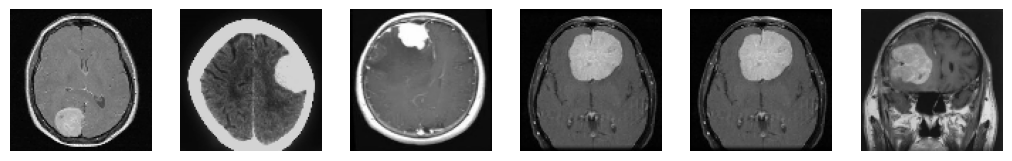

In [ ]:
import matplotlib.pyplot as plt
num_images = len(image_paths)
rows = 2
cols = (num_images + 1)
x = 2
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(image_paths, 1):
    img = cv2.imread(image_path)
    img_resized = resize_image(img, target_size=(100, 100))
    plt.subplot(rows, cols, i)
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()